# Logistic Regression

## Resources:

[Logistic Regression Tutorial for Machine Learning](http://machinelearningmastery.com/logistic-regression-tutorial-for-machine-learning/)

[Logistic Regression for Machine Learning](http://machinelearningmastery.com/logistic-regression-for-machine-learning/)

[How To Implement Logistic Regression With Stochastic Gradient Descent From Scratch With Python](http://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/)

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.


### Description

#### Logistic Regression

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **Sigmoid function** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

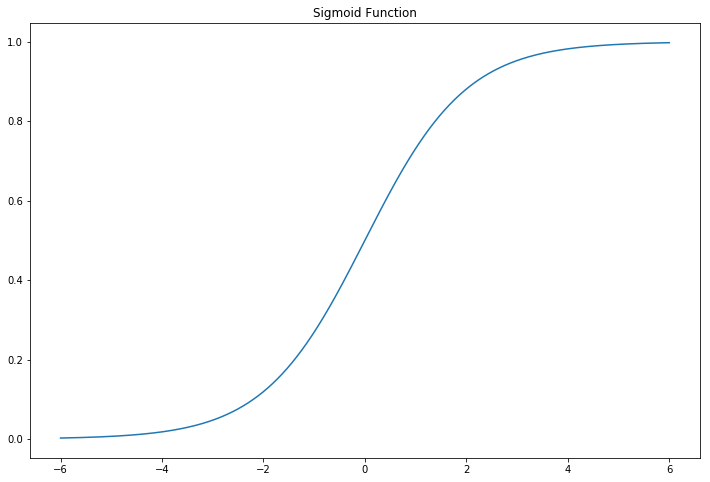

In [4]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");

The logistic regression equation has a very simiar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [6]:
tmp = [0, 0.4, 0.6, 0.8, 1.0]

In [7]:
tmp

[0, 0.4, 0.6, 0.8, 1.0]

In [8]:
np.round(tmp)

array([0., 0., 1., 1., 1.])

In [9]:
np.array(tmp) > 0.7

array([False, False, False,  True,  True])

# Making Predictions with Logistic Regression

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_i}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_i$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.

In [10]:
dataset = [[-2.0011, 0],
          [-1.4654, 0 ],
          [0.0965, 0],
           [1.3881, 0],
           [3.0641, 0],
           [7.6275, 1],
           [5.3324, 1],
           [6.9225, 1],
           [8.6754, 1],
           [7.6737, 1]]


Let's say you have been provided with the coefficient

In [11]:
coef = [-0.806605464, 0.2573316]

In [14]:
for row in dataset:
    yhat = 1.0 / (1.0 + np.exp(-coef[0] - coef[1] * row[0]))
    print('yhat {0:.4f}, yhat {1}'.format(yhat, round(yhat)))

yhat 0.2106, yhat 0.0
yhat 0.2344, yhat 0.0
yhat 0.3139, yhat 0.0
yhat 0.3895, yhat 0.0
yhat 0.4955, yhat 0.0
yhat 0.7606, yhat 1.0
yhat 0.6377, yhat 1.0
yhat 0.7261, yhat 1.0
yhat 0.8063, yhat 1.0
yhat 0.7628, yhat 1.0


# Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

# Learning with Stochastic Gradient Descent

Logistic Regression uses gradient descent to update the coefficients.

Each gradient descent iteration, the coefficients are updated using the equation:

$$\beta=\beta+\textrm{learning rate}\times (y-\hat{y}) \times \hat{y} \times (1-\hat{y}) \times x $$


# Using Scikit Learn to Estimate Coefficients

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
dataset

[[-2.0011, 0],
 [-1.4654, 0],
 [0.0965, 0],
 [1.3881, 0],
 [3.0641, 0],
 [7.6275, 1],
 [5.3324, 1],
 [6.9225, 1],
 [8.6754, 1],
 [7.6737, 1]]

In [36]:
X = np.array(dataset)[:, 0:1]
y = np.array(dataset)[:, 1]

In [37]:
X

array([[-2.0011],
       [-1.4654],
       [ 0.0965],
       [ 1.3881],
       [ 3.0641],
       [ 7.6275],
       [ 5.3324],
       [ 6.9225],
       [ 8.6754],
       [ 7.6737]])

In [38]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

In [39]:
clf_LR = LogisticRegression(C=1.0, penalty='l1', tol=0.01)

In [40]:
clf_LR.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)

In [41]:
clf_LR.predict(X)

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [43]:
clf_LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
clf_LR.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred = clf_LR.predict(X)
clf_LR.predict(X)


array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])

In [45]:
np.column_stack((y_pred, y))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

# Classification Based Machine Learning Algorithm

[An introduction to machine learning with scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)
                                                        
## Scikit-learn Definition:

**Supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

* **Classification**: samples belong to two or more *classes* and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.


* **Regression**: if the desired output consists of one or more *continuous variables*, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.
                                                        
MNIST dataset - a set of 70,000 small images of digits handwritten. You can read more via [The MNIST Database](http://yann.lecun.com/exdb/mnist/)                                                        

## Downloading the MNIST dataset

In [69]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [70]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [71]:
len(mnist['data'])

70000

# Visualizatio

In [72]:
X, y = mnist['data'], mnist['target']

In [73]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [74]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [75]:
X[69999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [76]:
y[69999]

9.0

In [77]:
X.shape

(70000, 784)

In [78]:
y.shape

(70000,)

In [79]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

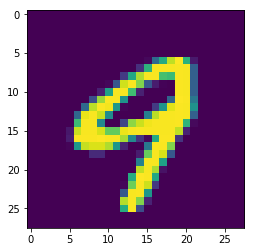

In [80]:
_ = X[69999]
_image = _.reshape(28,28)
plt.imshow(_image)

In [81]:
y[69999]

9.0

In [82]:
type(y)

numpy.ndarray

In [83]:
y ==4

array([False, False, False, ..., False, False, False])

In [84]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138]),)

In [86]:
y[24754]

4.0

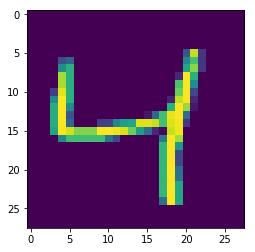

In [88]:
_ = X[24754]
_image = _.reshape(28,28)
plt.imshow(_image);

# Splitting the train and test sets

In [89]:
num_split = 60000

X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

**Tips**: Typically we shuffle the training set. This ensures the training set is randomised and your data distribution is consistent. However, shuffling is a bad idea for time series data.

# Shuffling the dataset

In [90]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two-class problem.

We need to first convert our target to 0 or non zero.

In [91]:
y_train_0 = (y_train == 0)

In [92]:
y_train_0

array([ True, False, False, ..., False, False,  True])

In [93]:
y_test_0 = (y_test == 0)

In [94]:
y_test_0

array([ True,  True,  True, ..., False, False, False])

# SGDClassifier

# Training

In [95]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

# Prediction

In [96]:
clf.predict(X[1000].reshape(1,-1))

array([False])

# Performance Measures

# Measuring Accuracy Using Cross-Validation

## StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

StratifiedKFold utilised the Stratified sampling concept

* The population is divided into homogeneous subgroups called strata
* The right number of instances is sampled from each stratum 
* To guarantee that the test set is representative of the population

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [100]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [103]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9875


/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9777


/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9872


#### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3

array([0.98750062, 0.97765   , 0.98724936])

In [106]:
cross_val_score(clf, X_train, y_train_0, cv=10, scoring='accuracy')

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3

array([0.98716881, 0.98066989, 0.98683553, 0.97116667, 0.986     ,
       0.9815    , 0.9865    , 0.97682947, 0.97666278, 0.98666444])

## Danger of Blindly Applying Evaluator As a Performance Measure

Let's check against a dumb classifier

In [107]:
1 - sum(y_train_0) / len(y_train_0) 

0.9012833333333333

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

# Confusion Matrix

In [108]:
from sklearn.model_selection import cross_val_predict

In [109]:
y_train_pred = cross_val_predict (clf, X_train, y_train_0, cv=3)

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(y_train_0, y_train_pred)

array([[53444,   633],
       [  319,  5604]])

Each row: actual class

Each column: predicted class

First row: Non-zero images, the negative class:
* 53360 were correctly classified as non-zeros. **True negatives**. 
* Remaining 717 were wrongly classified as 0s. **False positive**


Second row: The images of zeros, the positive class:
* 395 were incorrectly classified as 0s. **False negatives**
* 5528 were correctly classified as 0s. **True positives**


<img src="img\confusion matrix.jpg">

# Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

<img src="img\precision.jpg">

In [113]:
from sklearn. metrics import precision_score, recall_score

In [114]:
precision_score(y_train_0, y_train_pred)

0.8985088985088985

In [115]:
5528/(717+5528)

0.8851881505204163

## Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

<img src="img\recall.jpg">

In [117]:
recall_score(y_train_0, y_train_pred)

0.9461421576903596

In [118]:
5528/(395+5528)

0.9333108222184704

## F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.


In [119]:
from sklearn.metrics import f1_score

In [120]:
f1_score(y_train_0, y_train_pred)

0.9217105263157895

# Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

<img src="img\precision-recall.png">

Our classifier is designed to pick up zeros.

12 observations

***

**Central Arrow**

Suppose the decision threshold is positioned at the central arrow: 
* We get 4 true positives (We have 4 zeros to the right of the central arrow)
* 1 false positive which is actually seven.

At this threshold, the **precision accuracy** is $\frac{4}{5}=80\%$

However, out of the 6 zeros, the classifier only picked up 4. The **recall accuracy** is $\frac{4}{6}=67\%$

***

**Right Arrow**

* We get 3 true positives
* 0 false positive

At this threshold, the **precision accuracy** is $\frac{3}{3}=100\%$
However, out of the 6 zeros, the classifier only picked up 3. The **recall accuracy** is $\frac{3}{6}=50\%$

***

**Left Arrow**

* We get 6 true positives
* 2 false positive

At this threshold, the **precision accuracy** is $\frac{6}{8}=75\%$
Out of the 6 zeros, the classifier picked up all 6. The **recall accuracy** is $\frac{6}{6}=100\%$

***



In [121]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [126]:
y[1000]

0.0

In [127]:
y_scores = clf.decision_function(X[1000].reshape(1,-1))
y_scores

array([-11573.02647721])

In [128]:
threshold = 0

In [129]:
y_some_digits_pred = (y_scores > threshold)

In [131]:
y_some_digits_pred

array([False])

In [132]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([False])

In [135]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/hvyd/anaconda3

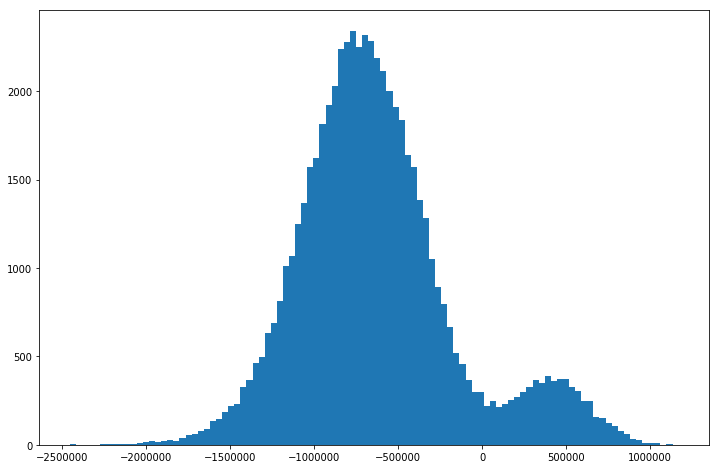

In [136]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

 with the decision scores, we can compute precision and recall for all possible thresholds using the precision_recall_curve() function:

In [137]:
from sklearn.metrics import precision_recall_curve

In [138]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [141]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([-0.5,1.5])

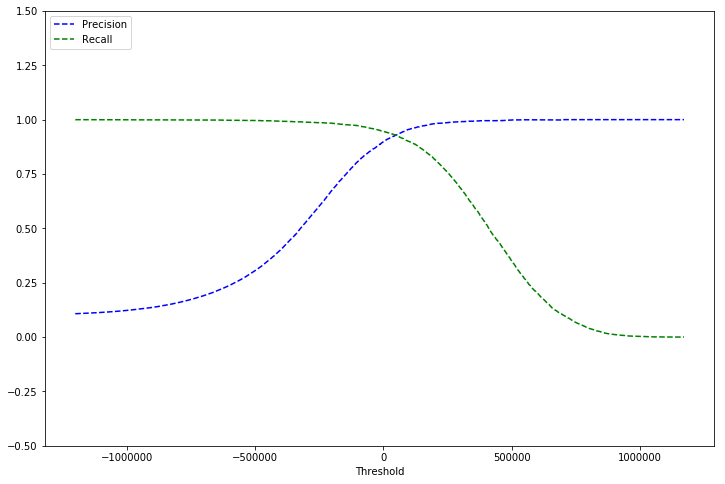

In [142]:
plt.figure(figsize=(12,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

One can also plot precisions against recalls to assist with the threshold selection

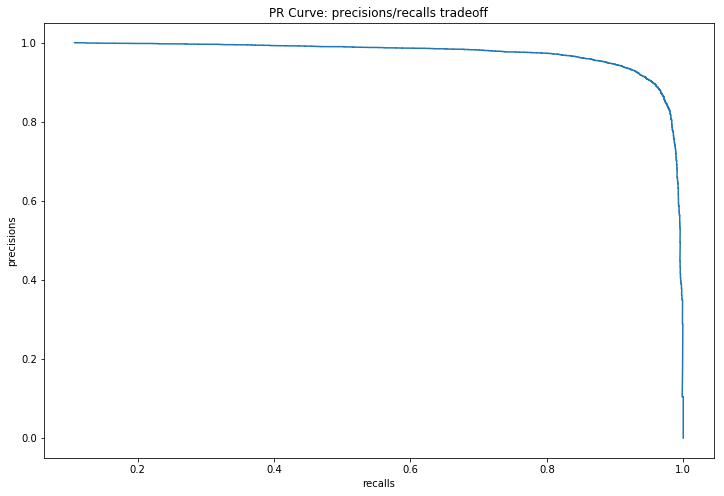

In [143]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

# Setting High Precisions

Let's aim for 90% precisions.

In [144]:
len(precisions)

55137

In [145]:
len(thresholds)

55136

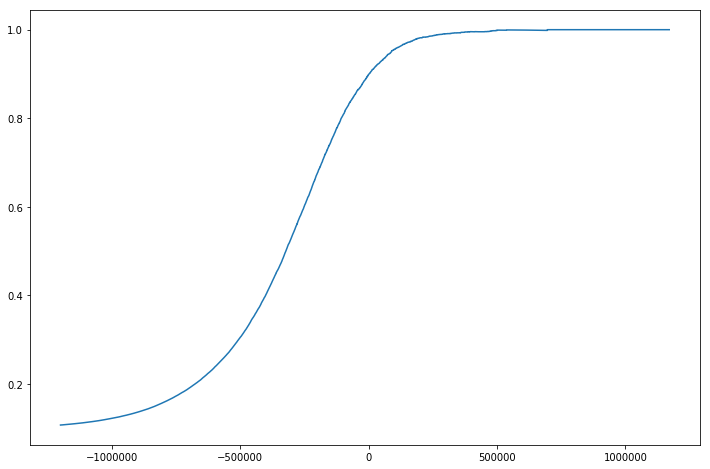

In [148]:
plt.figure(figsize=(12,8))
plt.plot(thresholds, precisions[1:])
plt.show()

In [150]:
idx = len(precisions[precisions < 0.9])

In [151]:
thresholds[idx]

1411.4484909995008

In [152]:
y_train_pred_90 = (y_scores > 1411)

In [153]:
precision_score(y_train_0, y_train_pred_90)

0.9000642673521851

In [154]:
recall_score(y_train_0, y_train_pred_90)

0.9458044909674151

# Setting High Precisions

Let's aim for 99% precisions.

In [155]:
idx = len(precisions[precisions < 0.99])

In [156]:
thresholds[idx]

288739.5116141156

In [157]:
y_train_pred_99 = (y_scores > thresholds[idx])

In [158]:
precision_score(y_train_0, y_train_pred_99)

0.9900190114068441

In [159]:
recall_score(y_train_0, y_train_pred_99)

0.7033597838932973

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

<img src="img\tnr_and_fpr.png">

In [160]:
from sklearn.metrics import roc_curve

In [161]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [163]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

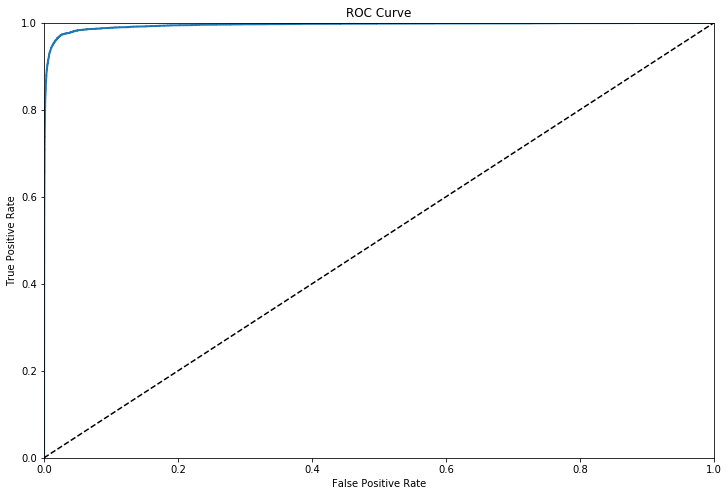

In [165]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [166]:
from sklearn.metrics import roc_auc_score

In [167]:
roc_auc_score(y_train_0, y_scores)

0.9947340582016804

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positi

In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# Model Comparison

# Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
f_clf = RandomForestClassifier(random_state=0)

In [171]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                   cv=3, method='predict_proba')

In [174]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

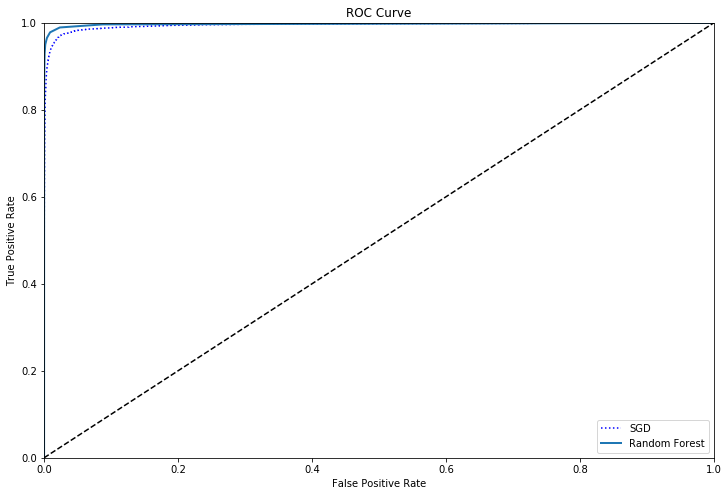

In [175]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [177]:
roc_auc_score(y_train_0, y_scores_forest)

0.9973608457979131

In [179]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [180]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [182]:
precision_score(y_train_0, y_train_rf)

0.9918962722852512

In [183]:
recall_score(y_train_0, y_train_rf)

0.9299341549890259

In [184]:
confusion_matrix(y_train_0, y_train_rf)

array([[54032,    45],
       [  415,  5508]])

# Support Vector Machine (SVM)

Invented in [1963](https://en.wikipedia.org/wiki/Support_vector_machine#History) by [Vladimir N. Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik) and Alexey Ya. Chervonenkis while working at AT&T Bell Labs. Vladimir N. Vapnik joined Facebook AI Research in Nov 2014.

In 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick to maximum-margin hyperplanes.

The current standard incarnation (soft margin) was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.



References:

1. [Support Vector Machine in Javascript Demo by Karpathy](http://cs.stanford.edu/people/karpathy/svmjs/demo/)

2. [SVM](http://www.svms.org/tutorials/)

3. [Statsoft](http://www.statsoft.com/Textbook/Support-Vector-Machines)

4. [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

5. [Scikit-Learn](http://scikit-learn.org/stable/modules/svm.html)



### Learning Outcomes:

* Introduction
* Linear SVM Classification
* Polynomial Kernal
* Radial Basis Function /  Gaussian Kernel
* Support Vector Regression

***


# 1. Introduction

Supervised learning methods used for classification, regression and outliers detection.

Let's assume we have two classes here - black and purple. In classification, we are interested in the best way to separate the two classes. 


<img src="img\SVM 1.png" height=50% width=50%>

We can separate them with a line such as the example below. You can consider this as an example of how logistic regression would segregate the two classes.


<img src="img\SVM 2.png" height=50% width=50%>

However, there are infinite lines (in 2-dimensional space) or hyperplanes (in 3-dimensional space) that can be used to separate the two classes as the example below illustrates. 

The term hyperplane essentially means it is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines. ~ [Wikipedia](https://en.wikipedia.org/wiki/Hyperplane)

<img src="img\SVM 3.png" height=50% width=50%>

In SVM, the **separating line**, the solid brown line, is the line that allows for largest margin between the two classes. 

SVM would place the separating line in the middle of the margin, also called maximum margin. SVM will optimise and locate the hyperplane that maximises the margin of the two classes.

The samples that are closest to the hyperplane are called **support vectors**, circled in red. 

<img src="img\SVM 4.png" height=50% width=50%>



***
# 2. Linear SVM Classification


* Support Vectors

* Separate with a straight line (linearly separable)

* Margin

  * Hard margin classification
      * Strictly based on those that are at the margin between the two classes
      * However, this is sensitive to outliers
      
  * Soft margin classification
      * Widen the margin and allows for violation
      * With Python Scikit-Learn, you control the width of the margin
      * Control with `C` hyperparameter
        * smaller `C` leads to a wider street but more margin violations
        * High `C` - fewer margin violations but ends up with a smaller margin



**Note:**

* SVM are sensitive to feature scaling


In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [186]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [193]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [199]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [200]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [201]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

Documentations on each:

* [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.
  
  
  
* [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

  C-Support Vector Classification.
  
  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [203]:
C = 1.0
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [204]:
clf.predict([[6,2]])

array([2])

In [205]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() +1
y_min, y_max = y.min(), y.max() +1 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

/home/hvyd/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'cmao', 'aplha'
  s)


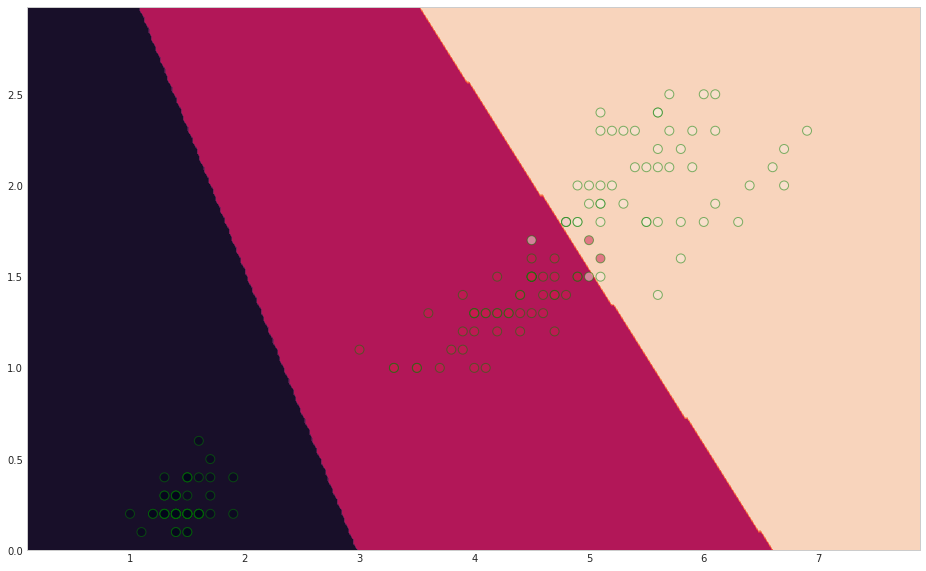

In [208]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmao = 'afmhot', aplha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80,
           alpha=0.5, edgecolors='g')

plt.show()


## Linear SVM Implementation